In [1]:
import numpy
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

In [ ]:
wineData = numpy.load("wineData.npy")
wineLabels = numpy.load("wineLabels.npy")
train_data=wineData[0:142]
test_data=wineData[142:]
train_labels=wineLabels[0:142]
test_labels=wineLabels[142:]

In [ ]:
scaler = StandardScaler()
scaler.fit(train_data)
standard_train_data = scaler.transform(train_data)
standard_test_data = scaler.transform(test_data)

In [ ]:
clf = SVC().fit(standard_train_data, train_labels)
score_wine_data = clf.score(standard_test_data, test_labels)
predicted_wine_labels = clf.predict(standard_test_data)
print(score_wine_data)

1.0


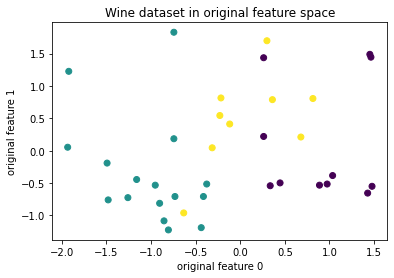

In [ ]:
plt.figure()
plt.scatter(standard_test_data[:,0], standard_test_data[:,1], c=test_labels)
plt.xlabel('original feature 0')
plt.ylabel('original feature 1')
plt.title('Wine dataset in original feature space')
plt.show() 

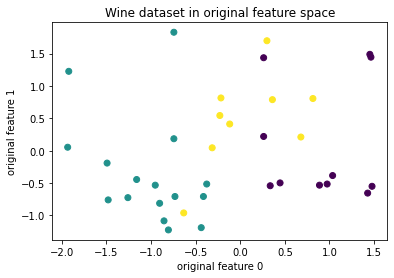

In [ ]:
plt.figure()
plt.scatter(standard_test_data[:,0], standard_test_data[:,1], c=predicted_wine_labels)
plt.xlabel('original feature 0')
plt.ylabel('original feature 1')
plt.title('Wine dataset in original feature space')
plt.show() 

I have recieved a score of 1 meaning my model predicted correctly for every sample

**4.2**

In [ ]:
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(13, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

In [ ]:
history = model.fit(standard_train_data, train_labels, epochs=200, validation_split=0.2)

Epoch 1/200
4/4 [==============================] - 1s 78ms/step - loss: 1.2931 - sparse_categorical_accuracy: 0.2566 - val_loss: 1.1224 - val_sparse_categorical_accuracy: 0.3793
Epoch 2/200
4/4 [==============================] - 0s 12ms/step - loss: 1.2336 - sparse_categorical_accuracy: 0.3009 - val_loss: 1.0804 - val_sparse_categorical_accuracy: 0.4138
Epoch 3/200
4/4 [==============================] - 0s 10ms/step - loss: 1.1809 - sparse_categorical_accuracy: 0.3451 - val_loss: 1.0401 - val_sparse_categorical_accuracy: 0.4138
Epoch 4/200
4/4 [==============================] - 0s 10ms/step - loss: 1.1285 - sparse_categorical_accuracy: 0.3805 - val_loss: 1.0015 - val_sparse_categorical_accuracy: 0.4828
Epoch 5/200
4/4 [==============================] - 0s 10ms/step - loss: 1.0800 - sparse_categorical_accuracy: 0.4336 - val_loss: 0.9656 - val_sparse_categorical_accuracy: 0.4828
Epoch 6/200
4/4 [==============================] - 0s 16ms/step - loss: 1.0367 - sparse_categorical_accuracy: 

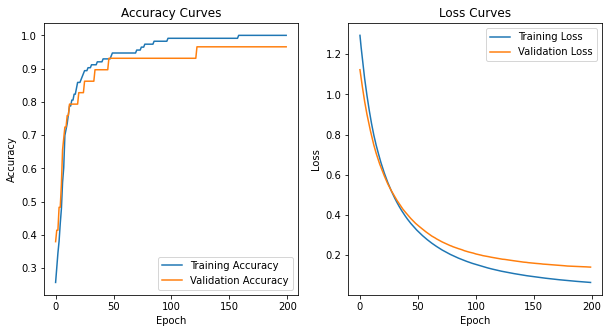

In [ ]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

In [ ]:
(numpy.argmax(model.predict(standard_test_data)))

2/2 [==============================] - 0s 7ms/step


93

2/2 [==============================] - 0s 6ms/step


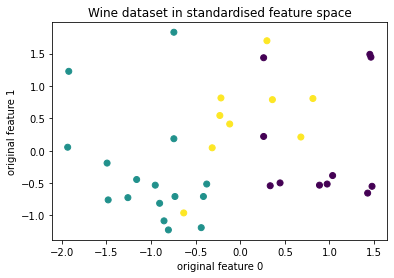

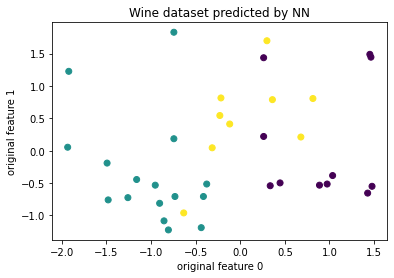

In [ ]:
plt.figure()
plt.scatter(standard_test_data[:,0], standard_test_data[:,1], c=test_labels)
plt.xlabel('original feature 0')
plt.ylabel('original feature 1')
plt.title('Wine dataset in standardised feature space')

plt.figure()
plt.scatter(standard_test_data[:,0], standard_test_data[:,1], c=numpy.argmax(model.predict(standard_test_data), axis=1))
plt.xlabel('original feature 0')
plt.ylabel('original feature 1')
plt.title('Wine dataset predicted by NN')
plt.show() 


plt.show() 

**4.3**

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train=numpy.reshape(x_train, (60000,784))
x_test=numpy.reshape(x_test, (10000,784))
normal_train=x_train/255
normal_test=x_test/255

In [4]:
model2 = tf.keras.Sequential(layers=[
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [5]:
model2.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

In [6]:
training_history = model2.fit(normal_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7246 - sparse_categorical_accuracy: 0.8098 - val_loss: 0.3381 - val_sparse_categorical_accuracy: 0.9056
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3210 - sparse_categorical_accuracy: 0.9090 - val_loss: 0.2726 - val_sparse_categorical_accuracy: 0.9220
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2646 - sparse_categorical_accuracy: 0.9242 - val_loss: 0.2359 - val_sparse_categorical_accuracy: 0.9321
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2292 - sparse_categorical_accuracy: 0.9347 - val_loss: 0.2094 - val_sparse_categorical_accuracy: 0.9403
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2028 - sparse_categorical_accuracy: 0.9424 - val_loss: 0.1893 - val_sparse_categorical_accuracy: 0.9482
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1813 - spars

In [7]:
predictions = model2.predict(normal_test)

313/313 [==============================] - 1s 1ms/step


In [8]:
evaluation=model2.evaluate(normal_test, y_test)
print(f'test loss, test acc ', evaluation)

313/313 [==============================] - 1s 2ms/step - loss: 0.1351 - sparse_categorical_accuracy: 0.9606
test loss, test acc  [0.13513273000717163, 0.9606000185012817]


Accuracy on test data = 0.9794

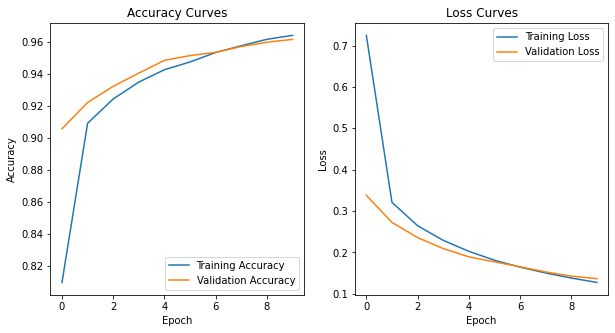

In [9]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(training_history.history['sparse_categorical_accuracy'])
plt.plot(training_history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

**4.4**

In [127]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train=numpy.expand_dims(x_train, axis=-1)
x_test=numpy.expand_dims(x_test, axis=-1)
nx_train=x_train/255
nx_test=x_test/255

In [128]:
# Create model
model3 = Sequential()

# Add convolution layers
model3.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model3.add(Conv2D(32, kernel_size=3, activation='relu'))

# Add pooling layers
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

# Flatten and feed into dense layer
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(10, activation='softmax'))

In [131]:
model3.compile(loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])


In [132]:
y_train.shape

(60000,)

In [134]:
conv_history = model3.fit(nx_train, y_train, epochs=8, validation_split=0.1, verbose=1) 

Epoch 1/8
1688/1688 [==============================] - 187s 111ms/step - loss: 0.1629 - accuracy: 0.9516 - val_loss: 0.0457 - val_accuracy: 0.9862
Epoch 2/8
1688/1688 [==============================] - 184s 109ms/step - loss: 0.0849 - accuracy: 0.9741 - val_loss: 0.0486 - val_accuracy: 0.9868
Epoch 3/8
1688/1688 [==============================] - 184s 109ms/step - loss: 0.0667 - accuracy: 0.9792 - val_loss: 0.0398 - val_accuracy: 0.9887
Epoch 4/8
1688/1688 [==============================] - 183s 108ms/step - loss: 0.0532 - accuracy: 0.9832 - val_loss: 0.0368 - val_accuracy: 0.9902
Epoch 5/8
1688/1688 [==============================] - 182s 108ms/step - loss: 0.0487 - accuracy: 0.9850 - val_loss: 0.0357 - val_accuracy: 0.9892
Epoch 6/8
1688/1688 [==============================] - 183s 109ms/step - loss: 0.0425 - accuracy: 0.9867 - val_loss: 0.0387 - val_accuracy: 0.9900
Epoch 7/8
1688/1688 [==============================] - 184s 109ms/step - loss: 0.0353 - accuracy: 0.9893 - val_loss: 0

In [135]:
score = model3.evaluate(nx_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02484818734228611
Test accuracy: 0.9919999837875366


In [136]:
print(conv_history.history)

{'loss': [0.16294251382350922, 0.08487517386674881, 0.06669995188713074, 0.05315189063549042, 0.04870397225022316, 0.04251568019390106, 0.035345662385225296, 0.03541601449251175], 'accuracy': [0.9515555500984192, 0.974148154258728, 0.9792407155036926, 0.9832037091255188, 0.9850370287895203, 0.9866851568222046, 0.9893147945404053, 0.9889444708824158], 'val_loss': [0.0456756129860878, 0.04858038201928139, 0.03980622440576553, 0.03679249435663223, 0.035668183118104935, 0.03865108639001846, 0.03208153694868088, 0.03536977991461754], 'val_accuracy': [0.9861666560173035, 0.9868333339691162, 0.9886666536331177, 0.9901666641235352, 0.9891666769981384, 0.9900000095367432, 0.9916666746139526, 0.9915000200271606]}


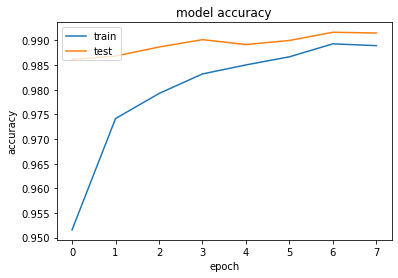

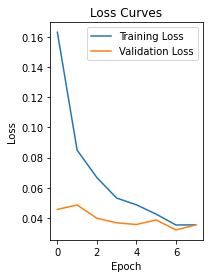

In [137]:
plt.plot(conv_history.history['accuracy'])
plt.plot(conv_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.subplot(122)
plt.plot(conv_history.history['loss'])
plt.plot(conv_history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()